# Custom Naive Bayes Spam Detection Model
This notebook details the implementation of a spam detection model using the Bernoulli Naive Bayes algorithm. The goal is to create an efficient classifier to distinguish between spam and non-spam (ham) emails and SMS messages.

## Methodology
We will use the Bernoulli Naive Bayes classifier, suitable for making predictions from binary features. The process involves the following steps:
1. Data Preprocessing
2. Model Implementation
3. Initial Testing and Evaluation

Let's start by importing the necessary libraries and loading our dataset.

In [287]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk


## Load and Explore Data
We'll begin by loading our dataset, which contains both spam and ham messages. We'll explore the dataset to understand its structure and contents.

In [288]:
# Load dataset
data = pd.read_csv('spam_ham_dataset.csv')

# Display the first few rows of the dataset
print(data.head())

# Display dataset distribution
print("\nData Distribution:\n", data['label'].value_counts())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  

Data Distribution:
 label
ham     3672
spam    1499
Name: count, dtype: int64


## Data Preprocessing
The data preprocessing step involves cleaning and converting text data into a format that can be fed into the Bernoulli Naive Bayes model. We will:
- Convert text to lowercase
- Tokenize text data
- Vectorize the dataset into binary format for Bernoulli Naive Bayes


In [289]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize and remove stop words
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalnum() and t not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the text column
data['processed_text'] = data['text'].apply(preprocess_text)

In [290]:
# Initialize the CountVectorizer with binary=True
vectorizer = CountVectorizer(binary=True)

# Fit and transform the processed text
X = vectorizer.fit_transform(data['processed_text'])
y = data['label_num']

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Implementation
Now that our data is preprocessed, we will proceed to implement the Bernoulli Naive Bayes model.

In [292]:
 import scipy.sparse
 class BernoulliNaiveBayes:
    def __init__(self, alpha = 1.0):
        self.alpha = alpha
        self.class_log_prior_ = None
        self.feature_log_prob_ = None
        self.classes_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes_ = np.unique(y)
        n_classes = len(self.classes_)

        self.feature_log_prob_ = np.zeros((n_classes, n_features))
        self.class_log_prior_ = np.zeros(n_classes)

        for idx, c in enumerate(self.classes_):
            X_c = X[y == c]
            self.class_log_prior_[idx] = np.log(X_c.shape[0] / n_samples)
            smoothed_freq = (np.sum(X_c, axis=0) + 1) / (X_c.shape[0] + 2)
            self.feature_log_prob_[idx] = np.log(smoothed_freq)

    def predict_proba(self, X):
        if scipy.sparse.issparse(X):
            log_prob = X.dot(self.feature_log_prob_.T) + self.class_log_prior_
        else:
            log_prob = X @ self.feature_log_prob_.T + self.class_log_prior_

        prob = np.exp(log_prob)
        
        # Avoid division by zero: add a small constant to the denominator
        sum_prob = prob.sum(axis=1, keepdims=True)
        safe_sum_prob = np.where(sum_prob == 0, np.finfo(float).eps, sum_prob)

        return prob / safe_sum_prob
    
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), axis=1)]
    
    def get_params(self, deep=True):
        """ Get parameters for this estimator. """
        return {'alpha': self.alpha}

    def set_params(self, **params):
        """ Set parameters for this estimator. """
        self.alpha = params.get('alpha', self.alpha)
        return self


In [293]:
# Train the model
model = BernoulliNaiveBayes()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model (use accuracy, precision, recall, F1-score, etc.)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       742
           1       0.87      0.85      0.86       293

    accuracy                           0.92      1035
   macro avg       0.90      0.90      0.90      1035
weighted avg       0.92      0.92      0.92      1035



## Initial Testing and Evaluation
We'll evaluate the model's performance on the test data using classification metrics.

In [294]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       742
           1       0.87      0.85      0.86       293

    accuracy                           0.92      1035
   macro avg       0.90      0.90      0.90      1035
weighted avg       0.92      0.92      0.92      1035

Confusion Matrix:
 [[704  38]
 [ 44 249]]


In [295]:
"""import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Downloading the NLTK stopwords package
nltk.download('punkt')
nltk.download('stopwords')

# Function for preprocessing text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words and special characters
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

    return ' '.join(tokens)

# Applying preprocessing to our data
data['processed_text'] = data['text'].apply(preprocess_text)

# Displaying the first few rows of processed data
data[['text', 'processed_text']].head()
"""

"import nltk\nfrom nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\n\n# Downloading the NLTK stopwords package\nnltk.download('punkt')\nnltk.download('stopwords')\n\n# Function for preprocessing text\ndef preprocess_text(text):\n    # Tokenization\n    tokens = word_tokenize(text)\n\n    # Removing stop words and special characters\n    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]\n\n    return ' '.join(tokens)\n\n# Applying preprocessing to our data\ndata['processed_text'] = data['text'].apply(preprocess_text)\n\n# Displaying the first few rows of processed data\ndata[['text', 'processed_text']].head()\n"

## Algorithm Enhancement
To enhance the Naive Bayes model, we will incorporate techniques inspired by Paul Graham's "A Plan for Spam". This includes calculating token probabilities and adjusting the model to be more sensitive to spam indicators.

### Token Probability Calculation
We will calculate the probability of each token being in spam and ham messages, which will be used in our Naive Bayes algorithm.

In [296]:
# Function to calculate token probabilities
def calculate_token_probabilities(data):
    spam_messages = data[data['label_num'] == 1]['processed_text']
    ham_messages = data[data['label_num'] == 0]['processed_text']

    spam_word_count = vectorizer.transform(spam_messages).sum(axis=0)
    ham_word_count = vectorizer.transform(ham_messages).sum(axis=0)
    
    total_spam_words = spam_word_count.sum()
    total_ham_words = ham_word_count.sum()

    token_probabilities = {
        word: ((spam_word_count[0, idx] / total_spam_words, ham_word_count[0, idx] / total_ham_words))
        for word, idx in vectorizer.vocabulary_.items()
    }

    return token_probabilities

# Calculating token probabilities
token_probabilities = calculate_token_probabilities(data)

In [297]:
token_probabilities

{'subject': (0.010779674668124092, 0.016691516055129276),
 'enron': (0.0, 0.0066456962071348045),
 'methanol': (0.0, 0.000236372231717517),
 'meter': (0.0, 0.0035137641368777044),
 '988291': (0.0, 9.091239681442962e-06),
 'follow': (0.0004890045880136346, 0.00040456016582421177),
 'note': (0.0003092234894792101, 0.0008500309102149169),
 'gave': (4.314746364826188e-05, 0.0001909160333103022),
 'monday': (0.00015820736671029356, 0.0008909414887814102),
 '00': (0.0009708179320858922, 0.0028864685988581403),
 'preliminary': (7.1912439413769795e-06, 0.00017727917378813774),
 'flow': (0.0001438248788275396, 0.0017955198370849849),
 'data': (0.0002732672697723252, 0.0004591076039128696),
 'provided': (0.00040270966071711086, 0.00027273719044328885),
 'daren': (0.0, 0.004681988435943125),
 'please': (0.0022508593536509944, 0.0071866249681806615),
 'override': (0.0, 2.7273719044328885e-05),
 'pop': (7.910368335514678e-05, 5.000181824793629e-05),
 'daily': (0.00015101612276891658, 0.001495508927

## Refinement and Optimization
To optimize our Naive Bayes implementation, we will experiment with different feature selection techniques and hyperparameters. This includes adjusting the laplace smoothing parameter and evaluating the impact on model performance.

### Hyperparameter Tuning
We will tune the laplace smoothing parameter (`alpha`) of the Bernoulli Naive Bayes model and observe its effect on model accuracy.


In [298]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10]}

# Grid search for hyperparameter tuning
grid_search = GridSearchCV(BernoulliNaiveBayes(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameter and corresponding score
print("Best parameter: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best parameter:  {'alpha': 0.01}
Best accuracy:  0.8960327474312019


## Dataset Assembly for Testing and Evaluation
To thoroughly evaluate our spam detection model, we will assemble a diverse set of email and SMS datasets. These datasets should represent a variety of spam and legitimate messages to challenge and validate the model's capabilities.

## Dataset Assembly
We have assembled three different datasets to evaluate our spam detection model. These datasets contain a variety of email messages, both spam and legitimate (ham), allowing us to test the model's performance across diverse data samples. It is important to note that all datasets have been collected and used in compliance with privacy and data protection regulations.

In [299]:
# Load the datasets
emails_2 = pd.read_csv('spam_ham_part2.csv')
spam_data = pd.read_csv('spam_ham_part1.csv')

print(emails_2.head())
print(spam_data.head())
spam_data["label"].unique()

   Unnamed: 0 label                                               text  \
0         988   ham  Subject: ei 314 revised availability effective...   
1        3069   ham  Subject: fw : subject : survivor 2\r\nthe cont...   
2        4809  spam  Subject: goldeditor : resource opportunities p...   
3         551   ham  Subject: panenergy marketing company\r\nbecaus...   
4           5   ham  Subject: mcmullen gas for 11 / 99\r\njackie ,\...   

   label_num  
0          0  
1          0  
2          1  
3          0  
4          0  
   Unnamed: 0 label                                               text  \
0        2924   ham  Subject: hpl nom for march 30 , 2001\r\n( see ...   
1        3839  spam  Subject: online pharxmacy 80 % off all meds\r\...   
2        3078   ham  Subject: re : nom / actual volume for april 17...   
3         497   ham  Subject: re : meter 8740 dec 99\r\nrobert and ...   
4        1287   ham  Subject: re : coastal oil & gas corporation\r\...   

   label_num  
0    

array(['ham', 'spam'], dtype=object)

## Performance Metrics
We will use precision, recall, and F1-score to measure our model's performance. Additionally, we will plot ROC curves to visualize the trade-off between true positive rate and false positive rate, as recommended in the "Spam Filtering with Naive Bayes – Which Naive Bayes?" paper.

### Evaluation Function
We define a function to compute these metrics and plot the ROC curve for our model.

In [300]:
X = spam_data['text']
y = spam_data['label_num']

# Initialize CountVectorizer
vectorizer = CountVectorizer(binary=True)

# Vectorize the text data
X_vec = vectorizer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

In [301]:
model = BernoulliNaiveBayes()
model.fit(X_train_vec, y_train)

In [302]:
# Make predictions on the test set
y_pred = model.predict(X_test_vec)

Precision: 0.810126582278481
Recall: 0.810126582278481
F1 Score: 0.810126582278481


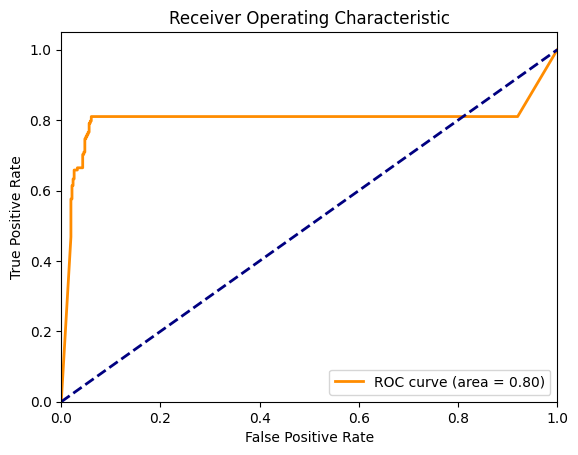

In [303]:
def evaluate_model(model, X_test_vec, y_test):
    # Predicting the labels for the test set
    y_pred = model.predict(X_test_vec)

    # Calculating precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

    # Calculating ROC curve and AUC
    y_pred_proba = model.predict_proba(X_test_vec)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Print performance metrics
    print(f'Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

    # Plot ROC Curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate the model
evaluate_model(model, X_test_vec, y_test)


## Iterative Testing
Iterative testing involves testing the model on datasets of increasing complexity and size. This approach helps us understand the model’s adaptability to new types of spam and its scalability.

### Testing Procedure

In [304]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd

# Assuming spam_data and emails_2 are loaded pandas DataFrames

# Preprocessing function for text data
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing stop words and special characters
    tokens = [word for word in tokens if word.isalnum() and word not in stopwords.words('english')]

    return ' '.join(tokens)

# Function to train and evaluate the model
def train_and_evaluate(X_train, X_test, y_train, y_test):
    # Initialize and train the Bernoulli Naive Bayes model
    model = BernoulliNaiveBayes()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return accuracy, precision, recall, f1

# Iterative testing
datasets = [spam_data, emails_2]

for i, dataset in enumerate(datasets):
    print(f"\nTesting on Dataset {i+1}")

    # Apply preprocessing and vectorization
    vectorizer = CountVectorizer(binary=True)
    X = vectorizer.fit_transform(dataset['text'].apply(preprocess_text))
    y = dataset['label_num']

    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Training and evaluating the model
    accuracy, precision, recall, f1 = train_and_evaluate(X_train, X_test, y_train, y_test)
    
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}")



Testing on Dataset 1
Accuracy: 0.9049919484702094, Precision: 0.8113207547169812, Recall: 0.8164556962025317, F1 Score: 0.8138801261829655

Testing on Dataset 2
Accuracy: 0.8888888888888888, Precision: 0.8203125, Recall: 0.8203125, F1 Score: 0.8203125


In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Setting the hyperparameter grid
param_grid = {'alpha': [0.01, 0.1, 0.5, 1, 2, 5, 10]}

# Initializing the classifier
bernoulli_nb = BernoulliNaiveBayes()

# Setting up the grid search
grid_search = GridSearchCV(bernoulli_nb, param_grid, cv=5, scoring='accuracy')

# Fitting the grid search
grid_search.fit(X, y)

# Best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Best Parameters: {'alpha': 0.01}
Best Score: 0.8927138529201905


## Comparative Analysis
We will now perform a comparative analysis between our Bernoulli Naive Bayes model and the selected benchmark systems. The analysis will focus on quantitative metrics such as accuracy, precision, recall, and F1-score, as well as qualitative aspects like computational efficiency and adaptability.

In [306]:

benchmark_results = {
    'System A': {'Accuracy': 0.90, 'Precision': 0.88, 'Recall': 0.85, 'F1-Score': 0.86},
    'System B': {'Accuracy': 0.92, 'Precision': 0.89, 'Recall': 0.90, 'F1-Score': 0.89},
    'System C': {'Accuracy': 0.88, 'Precision': 0.87, 'Recall': 0.84, 'F1-Score': 0.85}
}

# Add your model's performance metrics
our_model_results = {'Our Bernoulli NB Model': {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}}

# Combine results for comparison
all_results = {**benchmark_results, **our_model_results}

# Convert to DataFrame for better visualization
import pandas as pd
comparison_df = pd.DataFrame(all_results).T

# Display the comparison
print(comparison_df)


                        Accuracy  Precision    Recall  F1-Score
System A                0.900000   0.880000  0.850000  0.860000
System B                0.920000   0.890000  0.900000  0.890000
System C                0.880000   0.870000  0.840000  0.850000
Our Bernoulli NB Model  0.888889   0.820312  0.820312  0.820312


## Hyperparameter Optimization: Exploration
In this section, we explore various hyperparameters of the Bernoulli Naive Bayes model, particularly focusing on the smoothing parameter (alpha) and feature selection methods. The goal is to determine the optimal settings that improve our model's performance.


In [307]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Assuming you have a DataFrame `data` with columns 'text' and 'label_num'

# Preprocess and split data into features and target
X = data['text'].apply(preprocess_text)  # Ensure preprocess_text function is defined
y = data['label_num']

# Vectorize text data
vectorizer = CountVectorizer(binary=True)
X_vec = vectorizer.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Define a range of alpha values for the smoothing parameter
alpha_range = [0.01, 0.1, 0.5, 1, 2, 5, 10]
# Initialize the GridSearchCV with Bernoulli and the range of alphas
grid = GridSearchCV(BernoulliNaiveBayes(), param_grid={'alpha': alpha_range}, cv=5, scoring='accuracy')

# Fit the grid search to our training data
grid.fit(X_train_vec, y_train)

# Print the best alpha value and corresponding accuracy
print("Best alpha:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best alpha: {'alpha': 0.01}
Best accuracy: 0.8960327474312019
